## Medical Insurance Cost Prediction using ML regression model
- Build a machine learning model using traditional machine learning regression methods such as random forest and Gradient Boosting to accurately predict the medical insurance cost.
- Then, build an interactive web-based dashboard using Streamlit to be able to utilize the model by inserting custom user input.

### Dataset
- age
- sex: male or female
- bmi: Body Mass Index (BMI) is an objective measure of body weight relative to height, calculated as weight in kilograms divided by height in meters squared (kg/m²). A healthy BMI range is typically between 18.5 and 24.9, indicating a balanced weight for height.
- children: Number of children/dependents
- smoker: smoking / non-smoking
- region: the beneficiary's residential area in the US- northeast, southeast, southwest, northwest.
- charges: Individual medical costs billed by health insurance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn import model_selection
import pickle

In [2]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.loc[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [7]:
df = df.drop_duplicates()

### Exploratory Data Analysis

In [8]:
df['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [9]:
df['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [10]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

<Axes: title={'center': 'Medical insurance cost charges'}, ylabel='Frequency'>

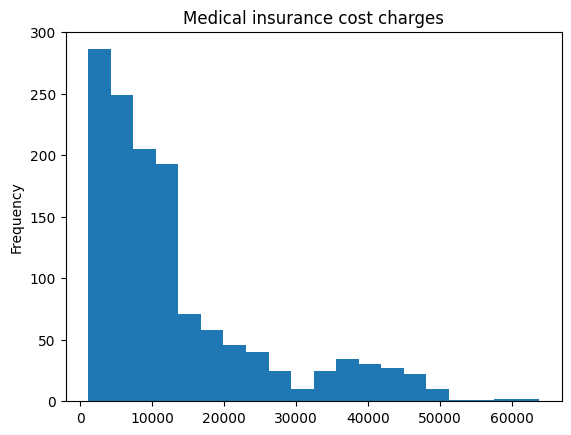

In [11]:
df['charges'].plot(kind='hist',
                  bins=20,
                  title = 'Medical insurance cost charges')

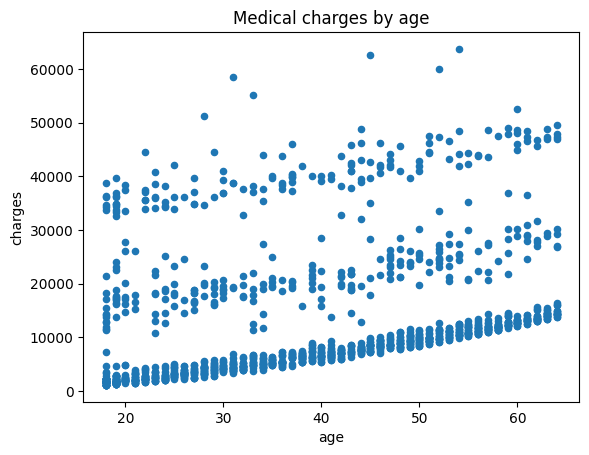

In [12]:
df.plot(kind='scatter',
       x = 'age',
       y = 'charges',
       title = 'Medical charges by age')
plt.show()

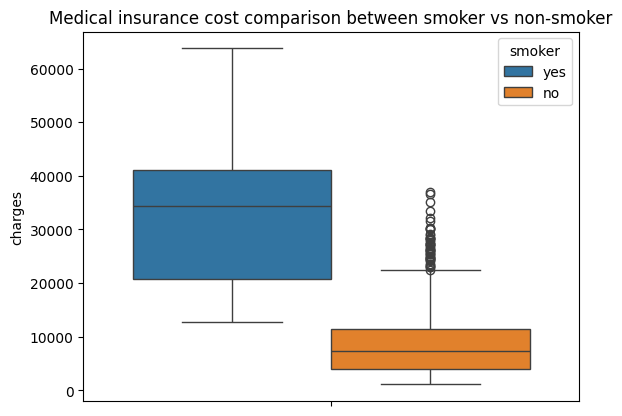

In [13]:
ax = sns.boxplot(y= 'charges', hue='smoker',
                data = df)
ax.set_title('Medical insurance cost comparison between smoker vs non-smoker')
plt.show()

### Data Preprocessing

In [14]:
encoder = LabelEncoder()

In [15]:
import warnings
warnings.filterwarnings("ignore")

labels = encoder.fit_transform(df['sex'])
df['sex'] = labels

In [16]:
labels = encoder.fit_transform(df['region'])
df['region'] = labels

In [17]:
labels = encoder.fit_transform(df['smoker'])
df['smoker'] = labels

In [18]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [19]:
# Split data
X = df.drop(columns='charges')
y = df['charges']

In [20]:
#train test split the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=123)

In [21]:
print(X.shape,X_train.shape,X_test.shape)

(1337, 6) (1069, 6) (268, 6)


In [53]:
rf = RandomForestRegressor(random_state=123)

In [54]:
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=123)

In [56]:
rf_pred = rf.predict(X_test)

In [61]:
score = metrics.r2_score(y_test, rf_pred)

In [62]:
score

0.8829027788487329

### Hyperparameter tuning

In [63]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [66]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                            cv=5, n_jobs=-1, verbose=2)

In [67]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=123), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [69]:
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
    
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}


In [70]:
score = metrics.r2_score(y_test, y_pred)

In [71]:
score

0.8977124536907751

### Exploring other models

In [36]:
models = [LinearRegression(),
         Ridge(random_state=123),
         HuberRegressor(),
         ElasticNetCV(random_state=123),
         DecisionTreeRegressor(random_state=123),
         RandomForestRegressor(random_state=123),
         ExtraTreesRegressor(random_state=123),
         GradientBoostingRegressor(random_state=123)]

In [37]:
def train(model):
    kfold = model_selection.KFold(n_splits=5)
    pred = model_selection.cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    cv_score = pred.mean()
    print('Model:',model)
    print('CV score:', abs(cv_score))

In [38]:
for model in models:
    train(model)

Model: LinearRegression()
CV score: 36884478.740364395
Model: Ridge(random_state=123)
CV score: 36886966.19302655
Model: HuberRegressor()
CV score: 47884380.078663506
Model: ElasticNetCV(random_state=123)
CV score: 130880935.39213887
Model: DecisionTreeRegressor(random_state=123)
CV score: 41427011.97389279
Model: RandomForestRegressor(random_state=123)
CV score: 24151984.799735535
Model: ExtraTreesRegressor(random_state=123)
CV score: 26697181.687152993
Model: GradientBoostingRegressor(random_state=123)
CV score: 20866104.735754244


In [39]:
gbr = GradientBoostingRegressor(random_state=123)

In [40]:
gbr.fit(X_train,y_train)

GradientBoostingRegressor(random_state=123)

In [41]:
y_pred = gbr.predict(X_test)

In [42]:
score = metrics.r2_score(y_test, y_pred)

In [43]:
score

0.9039385473091753

In [27]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [28]:
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid,
                            cv=5, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)

In [29]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=123),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [30]:
best_gbr = grid_search.best_estimator_
y_pred = best_gbr.predict(X_test)
    
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}


In [31]:
score = metrics.r2_score(y_test, y_pred)

In [32]:
score

0.9013188792836783

In [33]:
metrics.mean_absolute_percentage_error(y_test, y_pred)

0.3915567861739845

In [34]:
metrics.root_mean_squared_error(y_test, y_pred)

3905.4544291683055

In [ ]:
best_gbr = GradientBoostingRegressor(random_state=123)

### Plot prediction results

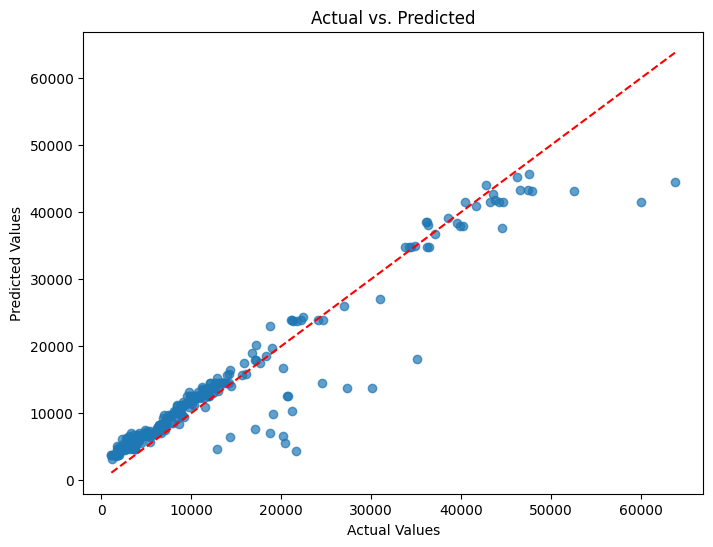

In [35]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted')
plt.show()

### Save the model

In [108]:
filename = 'medical_insurance_cost_predictor.sav'
pickle.dump(model, open(filename,'wb')) 